Evaluación de modelos y refinamiento

In [3]:
import numpy as np
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv"

df = pd.read_csv(url)
df.to_csv("module_5_auto.csv")

In [4]:
# Obtener solo los datos numericos del DataFrame con el metodo _get_numeric_data
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Entrenamiento y prueba

In [5]:
# Parte importante para los testeos es dividir los datos en datos de entrenamiento y datos de prueba.

# Dividir los datos 

# Asignar los datos de 'price'
y_data = df['price']

# Eliminar la columna precio de los datos originales
x_data = df.drop('price',axis=1)

# Se dividen los datos aleatoreamente en entrenamiento y testeo con la funcion 'train_test_split'
from sklearn.model_selection import train_test_split

# test_size se refiere a la cantidad porcentual de los datos que se utilizaran para el testeo
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.10,random_state=1)

# Se imprime el primer valor de la tupla generada y que corresponde al numero de filas en conjunto generado
print(f'El numero de muestras para testeo: {x_test.shape[0]}')
print(f'El numero de muestras para entrenamiento: {x_train.shape[0]}')

El numero de muestras para testeo: 21
El numero de muestras para entrenamiento: 180


Regresión lineal a las muestras

In [6]:
from sklearn.linear_model import LinearRegression

# Se generan los parametros para la regresión
lre = LinearRegression()

# Se entrena el modelo con las muestras y la variable objetivo
lre.fit(x_train[['horsepower']],y_train)

# Se cacula R^2
score_test = lre.score(x_test[['horsepower']],y_test)

# Se compara con el R^2 de los datos de entrenamiento
score_train = lre.score(x_train[['horsepower']],y_train) 

print(f'El r^2 de los datos de prueba: {score_test}')
print(f'El r^2 de los datos de entrenamiento: {score_train}')


El r^2 de los datos de prueba: 0.36358755750788263
El r^2 de los datos de entrenamiento: 0.6619724197515104


In [7]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_data,y_data,test_size=0.4,random_state=0)
lre1 = LinearRegression()
lre1.fit(x_train1[['horsepower']],y_train1)
lre1.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

Puntaje de Validacion Cruzada (Cross-Validation Score)

In [8]:
# Se utiliza cuando no se tiene suficientes datos para el testeo

from sklearn.model_selection import cross_val_score

# Se crea un objeto que almacena la variable independiente(x_data) y los datos objetivos(y_data)
# El parametro 'cv' determina el numero de particiones de los datos
Rcross = cross_val_score(lre,x_data[['horsepower']],y_data,cv=4)

# Cada valor dentro del array tiene un valor de r^2 promedio para cada partición
print(Rcross)

# Se calcula el promedio y la desviacion estandar del estimado
print(f'El promedio de las particiones es: {Rcross.mean()} y la desviacion estandar de: {Rcross.std()}')

# Se pronostica el R^2 a partir de los datos con la funcion cross_val_predict
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,x_data[['horsepower']],y_data,cv=4)
yhat # Valores pronosticados

[0.7746232  0.51716687 0.74785353 0.04839605]
El promedio de las particiones es: 0.522009915042119 y la desviacion estandar de: 0.2911839444756029


array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598, 13986.46002486, 13986.46002486, 13986.46002486,
       18641.80153159, 12589.85757284, 12589.85757284, 15693.41857732,
       15693.41857732, 15693.41857732, 25159.27964101, 25159.27964101,
       25159.27964101,  4365.42091095,  7779.33801589,  7779.33801589,
        7468.98191544,  7468.98191544, 12745.03562306,  7468.98191544,
        7468.98191544,  7468.98191544, 12745.03562306, 10572.54291992,
       19417.69178271,  5917.2014132 ,  8710.40631723,  6227.55751364,
        8710.40631723,  8710.40631723,  8710.40631723,  8710.40631723,
       10262.18681948, 10262.18681948, 10262.18681948, 10262.18681948,
       12589.85757284, 12434.67952262,  9020.76241768, 10882.89902037,
       24228.21133966, 24228.21133966, 37573.52365895,  7468.98191544,
        7468.98191544,  7468.98191544,  7468.98191544,  7191.77534249,
       12625.21956696, 12625.21956696, 12625.21956696, 18223.31361641,
      

In [9]:
Rcross1 = cross_val_score(lre,x_data[['horsepower']],y_data,cv=2)
Rcross1.mean()
yhat1 = cross_val_predict(lre,x_data[['horsepower']],y_data,cv=2)
yhat1

array([13577.7162064 , 13577.7162064 , 19353.86646699, 12368.75452396,
       14115.03250972, 13443.38713058, 13443.38713058, 13443.38713058,
       17473.25940541, 12234.42544813, 12234.42544813, 14921.00696468,
       14921.00696468, 14921.00696468, 23115.08059017, 23115.08059017,
       23115.08059017,  5114.98442926,  8070.22409747,  8070.22409747,
        7801.56594582,  7801.56594582, 12368.75452396,  7801.56594582,
        7801.56594582,  7801.56594582, 12368.75452396, 10488.14746237,
       18144.90478455,  6458.27518754,  8876.19855244,  6726.93333919,
        8876.19855244,  8876.19855244,  8876.19855244,  8876.19855244,
       10219.48931071, 10219.48931071, 10219.48931071, 10219.48931071,
       12234.42544813, 12100.0963723 ,  9144.85670409, 10756.80561402,
       22309.1061352 , 22309.1061352 , 33861.40665638,  7801.56594582,
        7801.56594582,  7801.56594582,  7801.56594582,  7801.56594582,
       12234.42544813, 12234.42544813, 12234.42544813, 16801.61402627,
      

Sobreajuste(Overfitting), Subajuste(Underfitting) y Seleccion del modelo

In [10]:
# Se realiza sobre modelos MLR y Regresión polinomica

#Se crean los objetos para la MLR
lr = LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)

# Se hace la prediccion de la varaible objetivo usando los datos de entrenamiento
yhat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

# Se hace la prediccion del target con los datos de prueba
yhat_test = lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Evaluacion de modelo

C:\Users\angel\AppData\Local\Temp\ipykernel_18740\2917467982.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\angel\AppData\Local\Temp\ipykernel_18740\2917467982.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = s

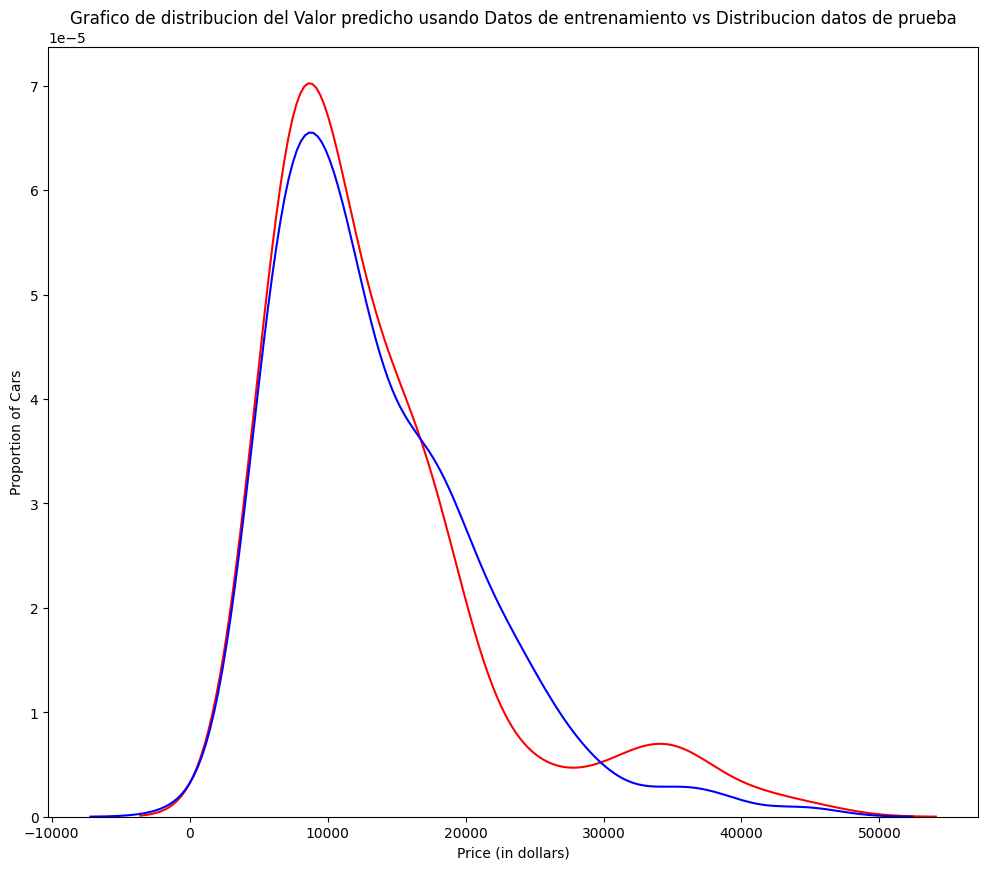

None


C:\Users\angel\AppData\Local\Temp\ipykernel_18740\2917467982.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\angel\AppData\Local\Temp\ipykernel_18740\2917467982.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = s

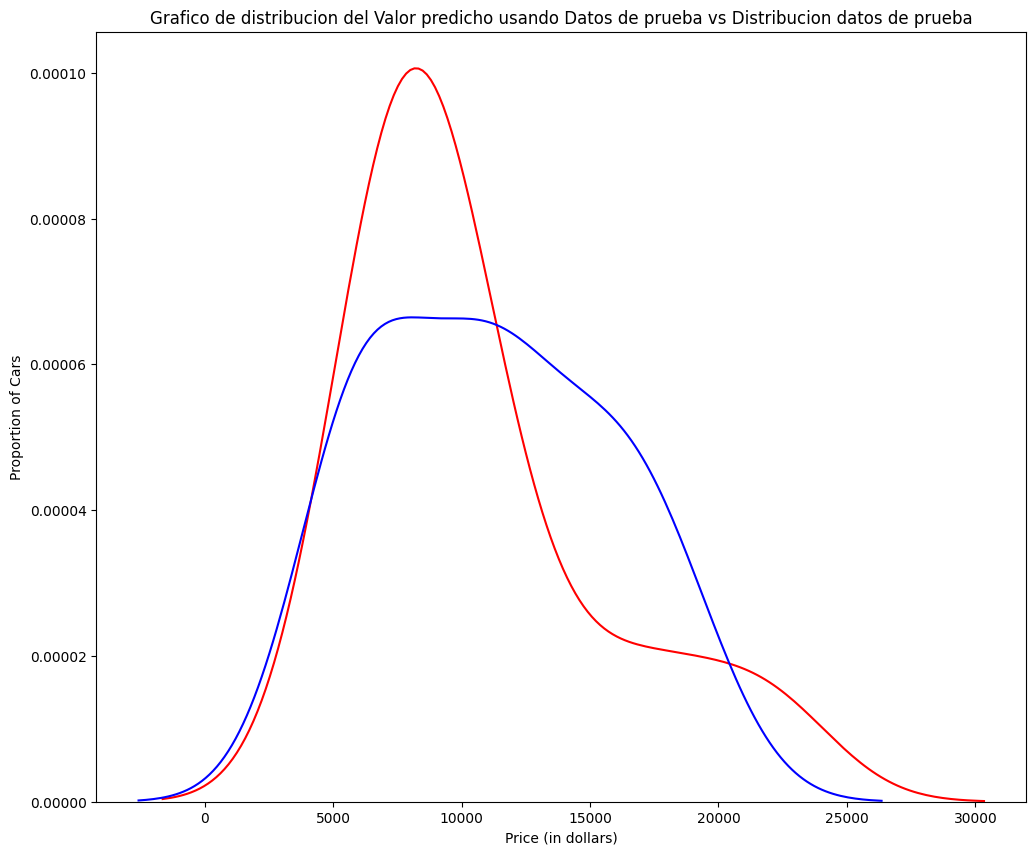

None


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

Title = "Grafico de distribucion del Valor predicho usando Datos de entrenamiento vs Distribucion datos de prueba"
print(DistributionPlot(y_train,yhat_train,'Valores Actuales(Entrenados)','Valores Predichos(Entrenados)',Title))

Title2 = "Grafico de distribucion del Valor predicho usando Datos de prueba vs Distribucion datos de prueba"
print(DistributionPlot(y_test,yhat_test,"Valores Actuales(Prueba)","Valores Predichos(Prueba)",Title2))

In [12]:
# Overfitting ocurre cuando el modelo ajusta el ruido.

from sklearn.preprocessing import PolynomialFeatures

x_trainpol,x_testpol,y_trainpol,y_testpol = train_test_split(x_data,y_data,test_size=0.45,random_state=0)

# Se crea el objeto para regresion polinomica
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_trainpol[['horsepower']])
x_test_pr = pr.fit_transform(x_testpol[['horsepower']])

# Se crea un modelo para Regresion lineal y se entrena
poly = LinearRegression()
poly.fit(x_train_pr,y_trainpol)

# Se predicen los valores y se asignan a la variable
yhat2 = poly.predict(x_test_pr)
yhat2[0:5]

# Se imprimen los valores de la prediccion y se comparan
print(f'Valores predecidos: {yhat2[0:4]}')
print(f'Valores reales: {y_testpol[0:4].values}')

Valores predecidos: [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457]
Valores reales: [ 6295. 10698. 13860. 13499.]


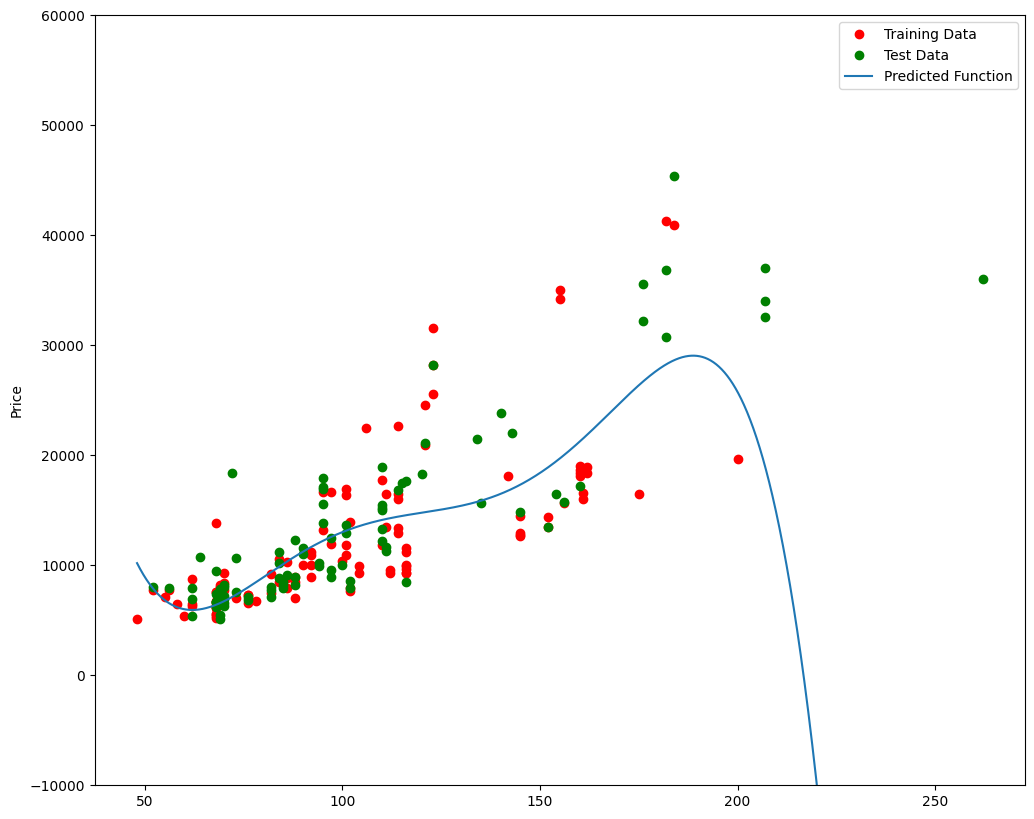

In [13]:
# Grafica para la regresion polinomica

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

PollyPlot(x_trainpol[['horsepower']],x_testpol[['horsepower']],y_trainpol,y_testpol,poly,pr)

Text(3, 0.75, 'R^2 Maximo')

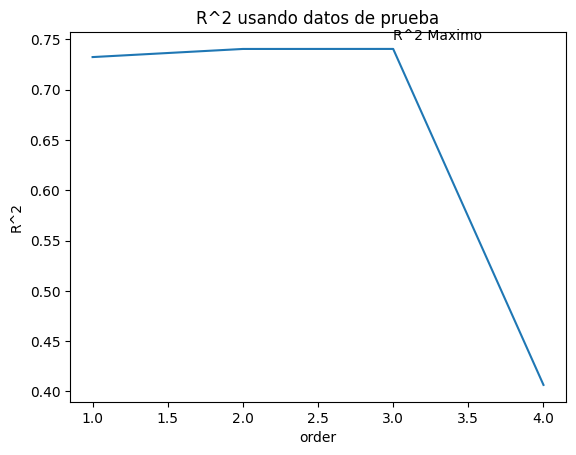

In [16]:
# Un R^2 negativo es una señal de sobreajuste

# Se calcula el R^2 de los datos de entrenamiento
poly.score(x_train_pr,y_trainpol)

# Se calcula el R^2 de los datos de prueba
poly.score(x_test_pr,y_testpol)

# Se genera un for loop para determinar que grado polinomico se ajusta mejor a los datos
Rsqu_test = []

order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_trainpol[['horsepower']])
    x_test_pr = pr.fit_transform(x_testpol[['horsepower']])
    lr.fit(x_train_pr,y_trainpol)
    Rsqu_test.append(lr.score(x_test_pr,y_testpol))

plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 usando datos de prueba')
plt.text(3,0.75,'R^2 Maximo')

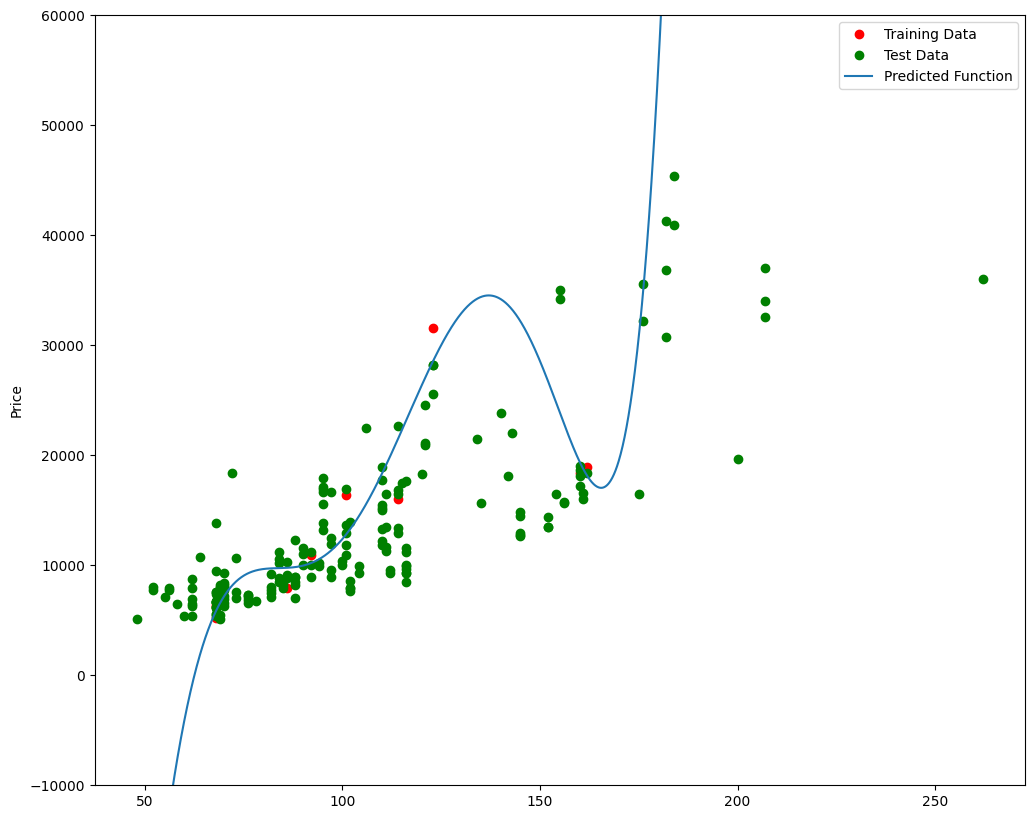

In [26]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

f(6,0.95)

Regresion Rigde o De cresta

In [30]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

from sklearn.linear_model import Ridge

RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

predicted: [ 9514.3818699   6672.42344634 10534.19951249  5506.01891856]
test set : [ 9549.  6229. 10245.  7295.]


  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=0.707, Train Score=0.862]

100%|██████████| 1000/1000 [00:06<00:00, 155.89it/s, Test Score=0.682, Train Score=0.858]


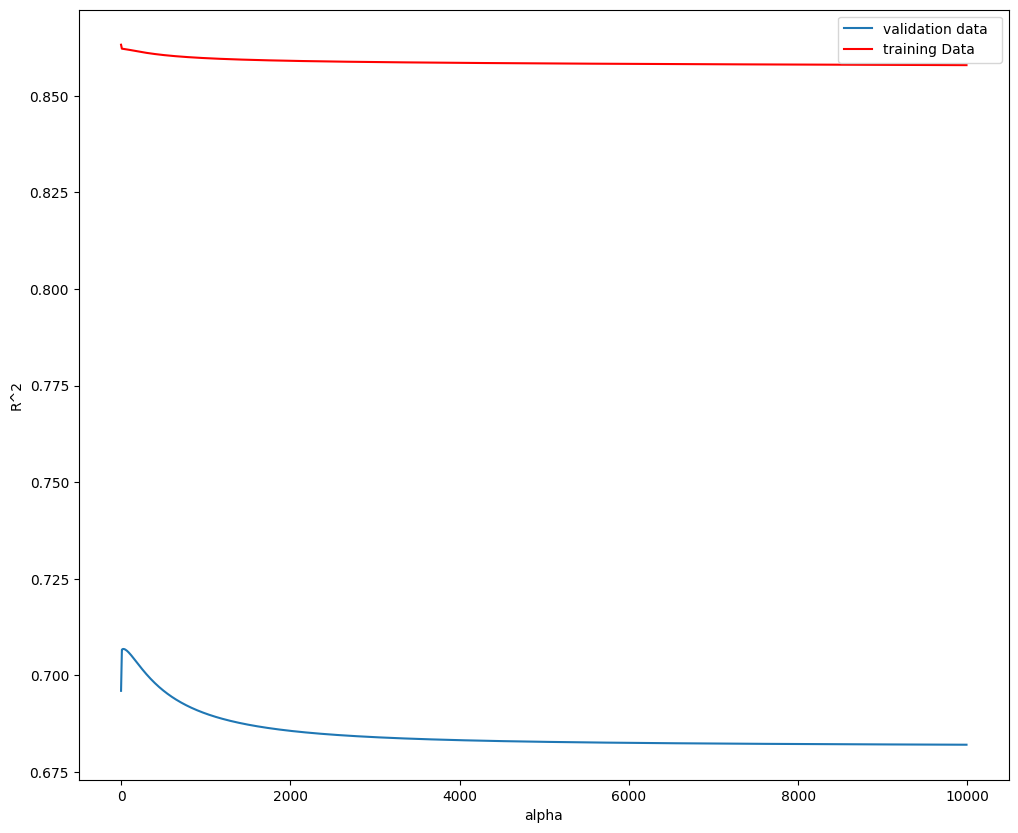

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Regresion de cuadricula

In [33]:
from sklearn.model_selection import GridSearchCV

# Se crea un diccionario con los valores de parametro
parametros = [{'alpha':[0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

# Se crea un objeto para la regresion Ridge
RR = Ridge()

# Se crea un objeto para la busqueda
Grid1 = GridSearchCV(RR,parametros,cv=4)

# Se ajusta el modelo
Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)

# Se encuentra el mejor valor para el valor del estimador alpha
BestRR = Grid1.best_estimator_
print(BestRR)
#Se prueba el modelo en los datos de prueba
BestRR.score(x_test[['horsepower','curb-weight','engine-size','highway-mpg']],y_test)


Ridge(alpha=10000)


0.6373308904159383